##### Importing our Dependencies 

In [144]:
# from helper import *
%run "helper.ipynb"

### Objective:
Our objective with our study will be compare using risk management techniques and evaluate is importance in this specific case to portfolio construction and resource allocation

#### Collecting Stock data

* **Inital capital: 100000**

Our portfolio will be composed by these 5 stocks:

* **Edp - Portugal - Ccy : EUR - YF SYMBOL : EDP.LS**

* **Adidas - Germany - Ccy : EUR - YF SYMBOL : ADS.DE**

* **Inditex - Spain - Ccy : EUR - YF SYMBOL : IXD1.DE**

* **Just Eat Takeway - England - Ccy : EUR - YF SYMBOL : TKWY.AS**

* **LVMH -  France - Ccy : EUR - YF SYMBOL : MC.PA**

We will compare the performance of two portfolios one composed by ourselves, and another using Kelly formula. 

The performance metrics used will be sharpe ratio, max drawdown, drawdown duration, CAGR.


The focus of the below study will be the risk management of these two portfolios

In [109]:
Capital = 100000
weights = np.array([0.34,  0.14, 0.1, 0.2, 0.22])
stocks = ['EDP.LS', 'ADS.DE', 'IXD1.DE', 'TKWY.AS', 'MC.PA']
simple_returns, log_returns = get_data(stocks, start_date="2017-01-01", end_date = "2023-06-01", columns=stocks, interval = "1d")

#### Our Portfolio

Our portfolio will consist in an initial allocation of: 34% in EDP, 14% in adidas, 10% in inditex, 20% in just eat Takeway, 22% in LVMH.

Therefore our portfolio returns would consist in a linear combination of each stock return as following:

$P = 0.34S_{1} + 0.14S_{2} + 0.1S_{3}  + 0.2S_{4} + 0.22S_{5}$

where:

$P$: Portfolio returns;  $S_{1}$: EDP; $S_{2}$: Adidas; $S_{3}$: Inditex; $S_{4}$: Just Eat Takeway; $S_{5}$: LVMH

In [111]:
try:
    simple_returns["our_portfolio"] = simple_returns @ weights
except Exception:
    print("Action already performed")

Action already performed


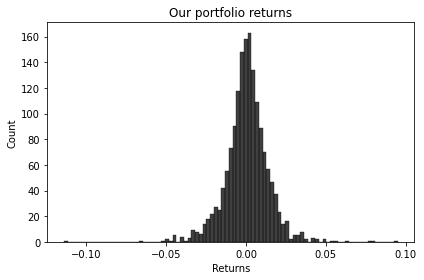

In [112]:
# Our portfolio returns histogram
sns.histplot(simple_returns.our_portfolio, fill=True, color="Black")
plt.title("Our portfolio returns")
plt.xlabel("Returns")
plt.tight_layout()
plt.show()

#### Half Kelly portfolio

* We considered, for simplicity risk free interest rate 0, and it has some logic because interest rates at that time were near 0.

The kelly & Thorp formula discovered by kelly and applied to financial markets and casino by Edward Thorp.

His (Thorp) derivation can be increadibly similar to sharpe ratio, a worldwide used metric to evaluate the performance of a specific investment, considering risk free-rate and the two first distribution moments.


Our derivation is based on the below expression and can be found in Ernest chan book (Algorithmic Trading) equation (8.2) :

* #### $F = \frac{C^{-1} M}{2}$

Where:

* $F$ : is our half kelly optimal leverage

* $C^{-1}$ : is the covariance matrix of the stocks returns

* $M$ : is the mean excess returns of these stocks




In [24]:
returns_kelly = simple_returns[stocks]

In [25]:
leverages = half_kelly_Thorp(0.00, returns_kelly, stocks)

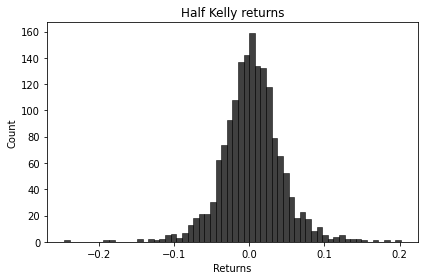

In [26]:
# Half kelly portfolio daily returns (one can see the leverage effect reflected in the x scale)
sns.histplot(returns_kelly @ leverages, fill=True, color="black")
plt.title("Half Kelly returns")
plt.xlabel("Returns")
plt.tight_layout()
plt.show()

### Quantitative risk Management

Here we will compute the portfolio losses, gains and check the VAR and ES for each portfolio at 95% and 99% confidence levels for the daily and annual periods.

But first we will start with an exploratory data Analysis, with some plots of the gains and with a special focus on losses 

#### Exploratoty data analysis 

##### Our portfolio Losses

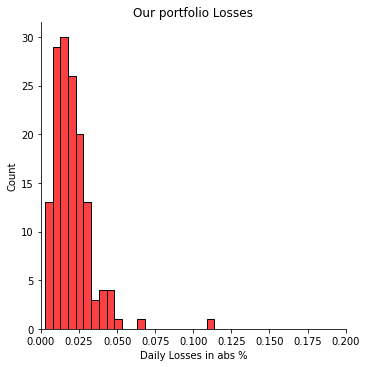

In [27]:
sns.displot(losses(simple_returns).our_portfolio, color="red")
plt.xlim([0, 0.2])
plt.title("Our portfolio Losses")
plt.xlabel("Daily Losses in abs %")
plt.show()

##### Our portfolio Gains 

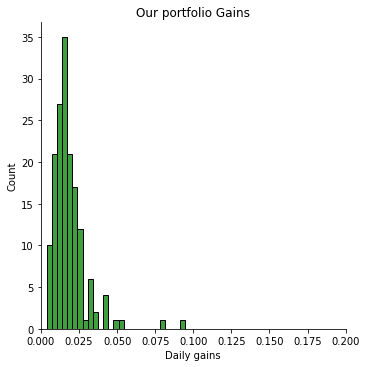

In [29]:
sns.displot(gains(simple_returns).our_portfolio, color="Green")
plt.xlim([0, 0.2])
plt.title("Our portfolio Gains")
plt.xlabel("Daily gains")
plt.show()

##### Half Kelly portfolio Losses

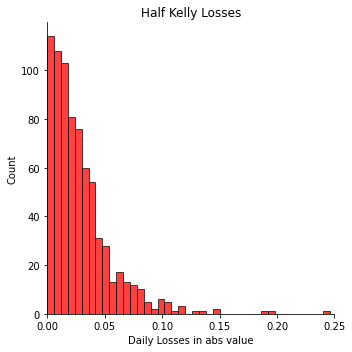

In [30]:
sns.displot(losses(returns_kelly @ leverages), color="red")
plt.xlim([0, 0.25])
plt.title("Half Kelly Losses")
plt.xlabel("Daily Losses in abs value")
plt.tight_layout()
plt.show()

##### Half Kelly portfolio Gains

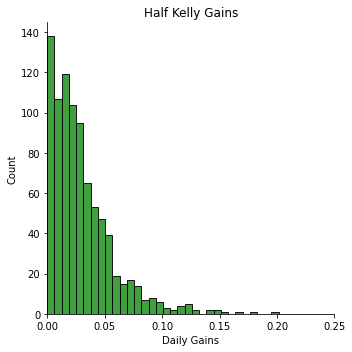

In [31]:
sns.displot(gains(returns_kelly @ leverages), color="green")
plt.xlim([0, 0.25])
plt.title("Half Kelly Gains")
plt.xlabel("Daily Gains")
plt.tight_layout()
plt.show()

#### Unparametric Approach

##### VAR$_{0.99}$

In [32]:
present_risk_metric("daily VAR", non_parametric_VAR, p=simple_returns.our_portfolio, q=0.99)
print("--------------------")
print(f"The daily value-at-risk of our portfolio at a confidence level of {int(0.99*100)}% is {int(Capital - (round(non_parametric_VAR(simple_returns.our_portfolio, 0.99), 4)*Capital))} euros")

The daily VAR is: 0.0447
--------------------
The daily value-at-risk of our portfolio at a confidence level of 99% is 95530 euros


##### ES$_{0.99}$

In [33]:
present_risk_metric("daily ES", non_parametric_ES, p=simple_returns.our_portfolio, q=0.99)
print("--------------------")
print(f"The daily expected shortfall of our portfolio at a confidence level of {int(0.99*100)}% is {int(Capital - (round(non_parametric_ES(simple_returns.our_portfolio, 0.99), 4)*Capital))} euros")

The daily ES is: 0.0585
--------------------
The daily expected shortfall of our portfolio at a confidence level of 99% is 94150 euros


##### VAR$_{0.95}$

In [34]:
present_risk_metric("daily VAR", non_parametric_VAR, p=simple_returns.our_portfolio, q=0.95)
print("--------------------")
print(f"The daily value-at-risk of our portfolio at a confidence level of {int(0.95*100)}% is {int(Capital - (round(non_parametric_VAR(simple_returns.our_portfolio, 0.95), 4)*Capital))} euros")

The daily VAR is: 0.029
--------------------
The daily value-at-risk of our portfolio at a confidence level of 95% is 97100 euros


##### ES$_{0.95}$

In [35]:
present_risk_metric("daily ES", non_parametric_ES, p=simple_returns.our_portfolio, q=0.95)
print("--------------------")
print(f"The daily expected shortfall of our portfolio at a confidence level of {int(0.95*100)}% is {int(Capital - (round(non_parametric_ES(simple_returns.our_portfolio, 0.95), 4)*Capital))} euros")

The daily ES is: 0.0395
--------------------
The daily expected shortfall of our portfolio at a confidence level of 95% is 96050 euros


### Plots and statistical tests

#### Maximum to Sum plot
The below graphs show the MS plot of the first 4 moments of the returns distribution. 
These plots are useful to see the moments finiteness, i.e., we can see whether mean, std, skew and kurtosis are finite or not.

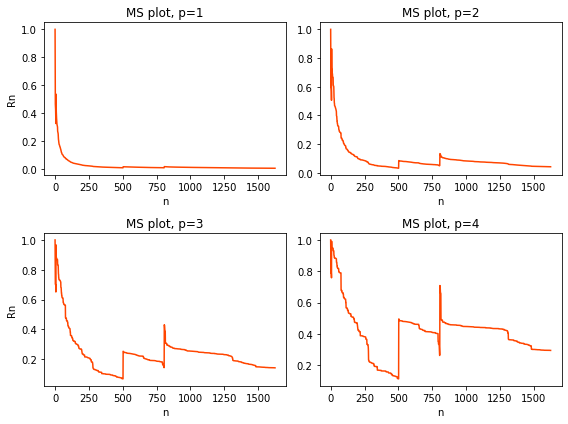

In [36]:
MSplot(simple_returns.our_portfolio)

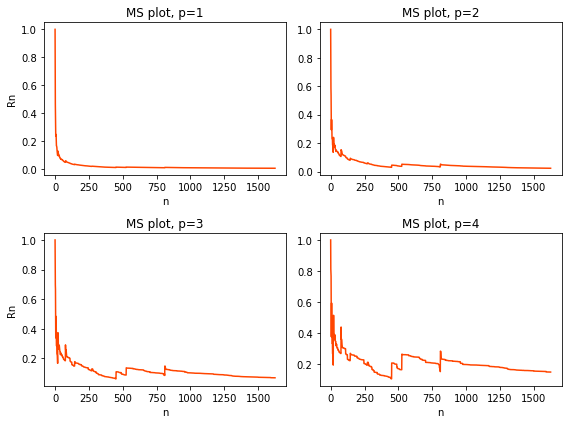

In [37]:
MSplot(returns_kelly @ leverages)

#### Comparison to a Standard Normal distribition

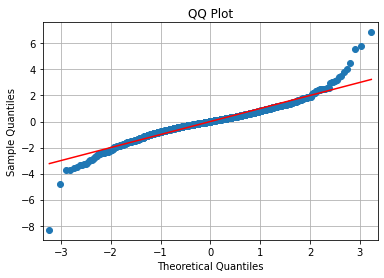

In [38]:
qqplot(data=simple_returns.our_portfolio, fit=True, dist=stats.norm, loc=0, scale=1, line="s")

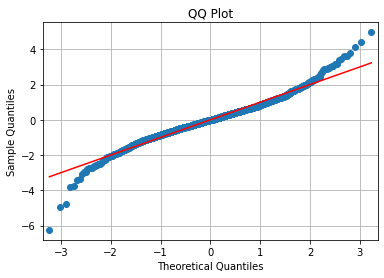

In [39]:
qqplot(data=returns_kelly @ leverages, fit=True, dist=stats.norm, loc=0, scale=1, line="s")

Visually we can assume that the underlying processes don't follow a normal distribution, 
But what can kolmogorov smirnov test tell us about normality...

In [120]:
if stats.ks_1samp(simple_returns.our_portfolio, stats.norm.cdf)[1] > 0.05:
    print("We not reject normality")
else:
    print("We reject normality")

We reject normality


In [121]:
if stats.ks_1samp(returns_kelly @ leverages, stats.norm.cdf)[1] > 0.05:
    print("We not reject normality")
else:
    print("We reject normality")

We reject normality


**Comparison to a student T distribition, much similar than a normal distribution**

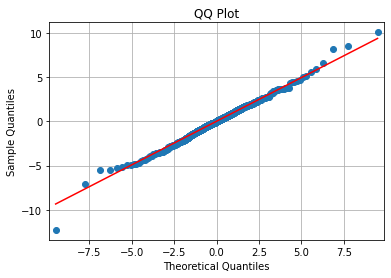

In [40]:
qqplot(data=simple_returns.our_portfolio, fit=True, dist=stats.t, line="q")

### Q-Q plot 

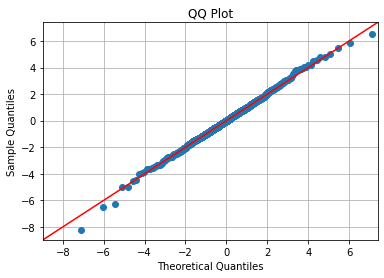

In [41]:
qqplot(data=returns_kelly @ leverages, fit=True, dist=stats.t, line="45")

#### Correlation matrix

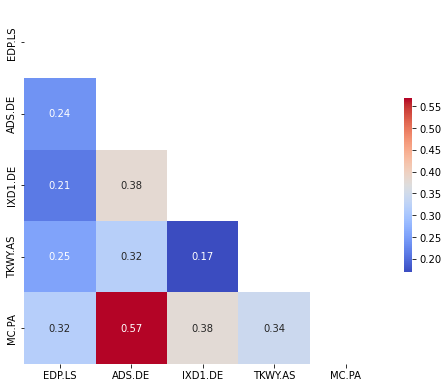

<Figure size 432x288 with 0 Axes>

In [21]:
correlation_matrix(simple_returns, stocks)
plt.savefig("correlation matrix", dpi=200)

#### ACF & PACF

our portfolio (without leverage effect)

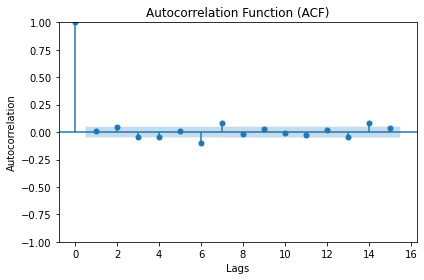

In [42]:
ACF(x=simple_returns.our_portfolio, lags=15)

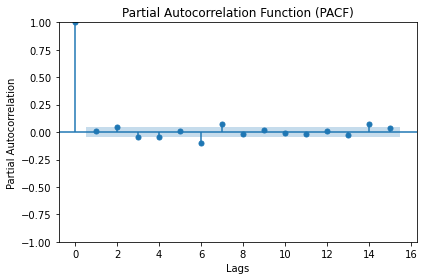

In [43]:
PACF(x=simple_returns.our_portfolio, lags=15, method="ywm")

kelly portfolio

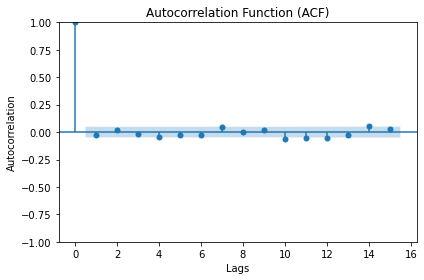

In [44]:
ACF(x=returns_kelly @ leverages, lags=15)

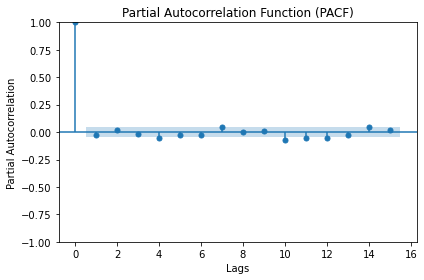

In [45]:
PACF(x=returns_kelly @ leverages, lags=15, method="ywm")

### Parametric approach (Model building approach)
**Though we can assume that returns are not normal, we will use model building approach and assume normality to check the results**

* $cov(i, j) = \sigma_{i} \sigma_{j} \rho_{i,j}$

* $\sigma_{p}^2 = \displaystyle\sum_{i=1}^{n}\sum_{j=1}^{n} cov(i, j)\alpha_{i}\alpha_{j} $


Using matrix representation, with C being the variance-covariance matrix fof returns and $\alpha$ is the vector of portfolio's weights.

* $\sigma_{p}^2 = \alpha^T C \alpha$

**Therefore:**

* VAR$_{1-\alpha} = \mu + \sigma \times \Phi^{-1} (1-\alpha)$

* ES$_{1-\alpha} = \mu + \sigma \times \frac{\phi(\Phi^{-1} (1-\alpha))}{\alpha}$

As we are checking daily VAR and ES we could assume $\mu = 0$, for simplicity:

* VAR$_{1-\alpha} =\sigma \times \Phi^{-1} (1-\alpha)$

* ES$_{1-\alpha} = \sigma \times \frac{\phi(\Phi^{-1} (1-\alpha))}{\alpha}$

##### VAR$_{0.99}$

In [98]:
present_risk_metric("daily parametric VAR", parametric_var, p=simple_returns[stocks], weights=weights, alpha=0.01)
print("--------------------")
print(f"The daily parametric value-at-risk of our portfolio at a confidence level of {int(0.99*100)}% is {int(Capital - (round(parametric_var(p=simple_returns[stocks], weights=weights, alpha=0.01), 4)*Capital))} euros")

The daily parametric VAR is: 0.032
--------------------
The daily parametric value-at-risk of our portfolio at a confidence level of 99% is 96800 euros


##### ES$_{0.99}$

In [99]:
present_risk_metric("daily parametric ES", parametric_expected_shortfall, p=simple_returns[stocks], weights=weights, alpha=0.01)
print("--------------------")
print(f"The daily parametric expected shortfall of our portfolio at a confidence level of {int(0.99*100)}% is {int(Capital - (round(parametric_expected_shortfall(p=simple_returns[stocks], weights=weights, alpha=0.01), 4)*Capital))} euros")

The daily parametric ES is: 0.0367
--------------------
The daily parametric expected shortfall of our portfolio at a confidence level of 99% is 96330 euros


##### VAR$_{0.95}$

In [100]:
present_risk_metric("daily parametric VAR", parametric_var, p=simple_returns[stocks], weights=weights, alpha=0.05)
print("--------------------")
print(f"The daily parametric value-at-risk of our portfolio at a confidence level of {int(0.95*100)}% is {int(Capital - (round(parametric_var(p=simple_returns[stocks], weights=weights, alpha=0.05), 4)*Capital))} euros")

The daily parametric VAR is: 0.0226
--------------------
The daily parametric value-at-risk of our portfolio at a confidence level of 95% is 97740 euros


##### ES$_{0.95}$

In [101]:
present_risk_metric("daily parametric ES", parametric_expected_shortfall, p=simple_returns[stocks], weights=weights, alpha=0.05)
print("--------------------")
print(f"The daily parametric expected shortfall of our portfolio at a confidence level of {int(0.95*100)}% is {int(Capital - (round(parametric_expected_shortfall(p=simple_returns[stocks], weights=weights, alpha=0.05), 4)*Capital))} euros")

The daily parametric ES is: 0.0284
--------------------
The daily parametric expected shortfall of our portfolio at a confidence level of 95% is 97160 euros


#### Parametric method under fat tailed process 
**Fitted parameters T-student**

**Our portfolio**

In [177]:
df_fit, loc_fit, scale_fit = obtain_parameters([1, 0, 1], simple_returns.our_portfolio)

In [178]:
samples = stats.t.rvs(df_fit, loc=loc_fit, scale=scale_fit, size=len(simple_returns))

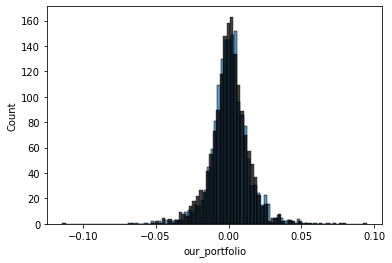

In [179]:
sns.histplot(samples, fill=True)
sns.histplot(simple_returns.our_portfolio, color="black", fill=True)
plt.show()

**Half kelly portfolio**

In [167]:
df_fit, loc_fit, scale_fit = obtain_parameters([1, 0, 1], returns_kelly @ leverages)

In [168]:
samples = stats.t.rvs(df_fit, loc=loc_fit, scale=scale_fit, size=len(simple_returns))

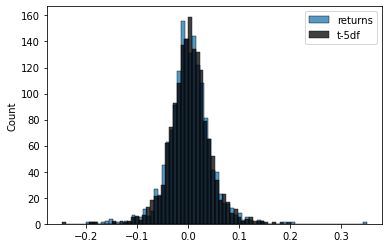

In [175]:
sns.histplot(samples, fill=True)
sns.histplot(returns_kelly @ leverages, color="black", fill=True)
plt.legend(['returns', f"t-{round(df_fit)}df"])
plt.show()